In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# Dataset preparation

In [2]:
data=pd.read_csv(r"C:\Users\preeti\Downloads\CSUSHPISA.csv")
data.head()

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       441 non-null    object 
 1   CSUSHPISA  441 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [4]:
data.DATE=pd.to_datetime(data.DATE)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       441 non-null    datetime64[ns]
 1   CSUSHPISA  441 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


In [6]:
files = ['HNFSEPUSSA', 'HOUST1F', 'HSN1F', 'INTDSRUSM193N',
       'LFACTTTTUSM657S', 'MSACSR', 'NA000334Q', 'NASDAQCOM', 'PERMIT',
       'PERMIT1', 'QUSR628BIS', 'RSAHORUSQ156S', 'TTLCONS', 'UNRATE','CSUSHPISA']

In [7]:
## creating the function to convert the date time format of all the parameters to YYYY-MM-DD

def date_col(arr):
    arr = arr.str.replace(" ","-")
    for i in range(len(arr)):
        arr[i]=dt.datetime.strptime(arr[i], '%d-%m-%y').strftime('%Y-%m-%d')
    return arr

In [8]:
#mering all the files
import os

os.chdir(r"C:\Users\preeti\Downloads")

In [9]:

for i in range(len(files)-1):
    temp=pd.read_csv(files[i]+'.csv')
    if len(temp.iloc[0,0])==8:
        temp.iloc[:,0] = date_col(temp.iloc[:,0])
    temp.DATE=pd.to_datetime(temp.DATE)
    data=pd.merge(left=data, right=temp, left_on='DATE', right_on='DATE',how='left')

In [10]:
data

,DATE,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE
0,1987-01-01,63.965,356.0,1224,709,5.5,0.197284,6.0,1148876.0,384.227143,1690.0,1088.0,85.4172,63.9,NaN,6.6
1,1987-02-01,64.424,357.0,1282,732,5.5,0.233077,6.2,NaN,411.712632,1689.0,1195.0,NaN,NaN,NaN,6.6
2,1987-03-01,64.736,358.0,1205,713,5.5,0.124242,6.0,NaN,432.204545,1704.0,1132.0,NaN,NaN,NaN,6.6
3,1987-04-01,65.132,358.0,1181,735,5.5,0.055337,6.0,1205023.0,422.771429,1601.0,1057.0,86.2084,63.9,NaN,6.3
4,1987-05-01,65.563,353.0,1141,651,5.5,0.563116,6.7,NaN,416.634000,1500.0,1006.0,NaN,NaN,NaN,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2023-05-01,302.566,426.0,1012,710,NaN,0.077990,7.2,NaN,12446.530455,1496.0,902.0,NaN,NaN,1946733.0,3.7
437,2023-06-01,304.593,429.0,930,683,NaN,0.079728,7.5,NaN,13463.777619,1441.0,924.0,NaN,NaN,1956226.0,3.6
438,2023-07-01,306.767,431.0,988,736,NaN,0.091045,7.0,6920709.0,14033.091000,1443.0,930.0,NaN,66.0,1969005.0,3.5
439,2023-08-01,309.155,432.0,933,676,NaN,0.440447,7.7,NaN,13743.213043,1541.0,948.0,NaN,NaN,1988312.0,3.8


In [11]:
# selecting data from 2003 to 2023
data=data[(data.DATE.dt.year>=2003) & (data.DATE.dt.year<=2023)]
data.reset_index(drop=True,inplace=True)

In [12]:
# Finding the null values
data.isna().sum()

DATE                 0
CSUSHPISA            0
HNFSEPUSSA           0
HOUST1F              0
HSN1F                0
INTDSRUSM193N       25
LFACTTTTUSM657S      1
MSACSR               0
NA000334Q          166
NASDAQCOM            0
PERMIT               0
PERMIT1              0
QUSR628BIS         167
RSAHORUSQ156S      166
TTLCONS              0
UNRATE               0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             249 non-null    datetime64[ns]
 1   CSUSHPISA        249 non-null    float64       
 2   HNFSEPUSSA       249 non-null    float64       
 3   HOUST1F          249 non-null    int64         
 4   HSN1F            249 non-null    int64         
 5   INTDSRUSM193N    224 non-null    float64       
 6   LFACTTTTUSM657S  248 non-null    float64       
 7   MSACSR           249 non-null    float64       
 8   NA000334Q        83 non-null     float64       
 9   NASDAQCOM        249 non-null    float64       
 10  PERMIT           249 non-null    float64       
 11  PERMIT1          249 non-null    float64       
 12  QUSR628BIS       82 non-null     float64       
 13  RSAHORUSQ156S    83 non-null     float64       
 14  TTLCONS          249 non-null    float64  

In [14]:
for i in data:
    if data[i].dtype in ('int64','float64'):
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        ul=q3+1.5*iqr
        ll=q1-1.0*iqr
        if data[i].min()<ll or data[i].max()>ul:
            data[i].fillna(data[i].median(),inplace = True)
        else:
            data[i].fillna(data[i].mean(),inplace = True)
  


In [15]:
data.isna().sum()

DATE               0
CSUSHPISA          0
HNFSEPUSSA         0
HOUST1F            0
HSN1F              0
INTDSRUSM193N      0
LFACTTTTUSM657S    0
MSACSR             0
NA000334Q          0
NASDAQCOM          0
PERMIT             0
PERMIT1            0
QUSR628BIS         0
RSAHORUSQ156S      0
TTLCONS            0
UNRATE             0
dtype: int64

In [16]:
df=pd.read_csv('historical us home prices - Copy.csv')

In [17]:
df

,category,Median Home Price (NSA),CPI-Adjusted Price
0,Thu Jan 15 1953,18080.26,208688.34
1,Sun Feb 15 1953,18080.26,209475.85
2,Sun Mar 15 1953,18080.26,208688.34
3,Wed Apr 15 1953,18122.25,209173.00
4,Fri May 15 1953,18143.25,208631.07
...,...,...,...
842,Wed Mar 15 2023,385402.52,392029.43
843,Sat Apr 15 2023,391534.51,396262.15
844,Mon May 15 2023,396887.99,400671.21
845,Thu Jun 15 2023,399117.81,401625.47


In [18]:
for i in range(len(df)):
    df.iloc[i,0] = df.iloc[i,0][4:] 

In [19]:
# formatting date into desired format
for i in range(len(df)):
    df.iloc[i,0]=dt.datetime.strptime(df.iloc[i,0], '%b %d %Y').strftime('%Y-%m-%d')

In [20]:
# resetting the date to start of each month to ease the merging process
df.iloc[:,0] = df.iloc[:,0].str.replace("-15","-01")

In [21]:
df

,category,Median Home Price (NSA),CPI-Adjusted Price
0,1953-01-01,18080.26,208688.34
1,1953-02-01,18080.26,209475.85
2,1953-03-01,18080.26,208688.34
3,1953-04-01,18122.25,209173.00
4,1953-05-01,18143.25,208631.07
...,...,...,...
842,2023-03-01,385402.52,392029.43
843,2023-04-01,391534.51,396262.15
844,2023-05-01,396887.99,400671.21
845,2023-06-01,399117.81,401625.47


In [22]:
df.isnull().sum()

category                   0
Median Home Price (NSA)    0
CPI-Adjusted Price         0
dtype: int64

In [23]:
df.category=pd.to_datetime(df.category)

In [24]:
# final dataset 
final=pd.merge(left=data, right=df, left_on='DATE', right_on='category',how='left')

In [25]:
final.drop(columns=['category'], inplace=True)

In [26]:
final.head()

,DATE,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price
0,2003-01-01,128.461,341.0,1537,999,2.25,0.600416,4.0,2.743734e+06,1389.559524,1808.0,1416.0,114.169800,68.100000,863855.0,5.8,160883.13,271850.87
1,2003-02-01,129.355,341.0,1301,936,2.25,0.111692,4.5,4.403328e+06,1313.261579,1854.0,1357.0,124.572444,66.192771,859225.0,5.9,161921.15,271512.85
2,2003-03-01,130.148,338.0,1399,999,2.25,-0.053388,4.1,4.403328e+06,1348.503810,1757.0,1359.0,124.572444,66.192771,851132.0,5.9,163045.67,271765.80
3,2003-04-01,130.884,340.0,1374,1012,2.25,0.309542,4.1,2.831413e+06,1409.830952,1803.0,1391.0,116.211200,68.200000,859459.0,6.0,164583.47,274926.03
4,2003-05-01,131.735,343.0,1391,1078,2.25,0.017751,3.9,4.403328e+06,1524.182857,1835.0,1389.0,124.572444,66.192771,866814.0,6.1,166198.17,278077.16


In [27]:
final.isna().sum()

DATE                       0
CSUSHPISA                  0
HNFSEPUSSA                 0
HOUST1F                    0
HSN1F                      0
INTDSRUSM193N              0
LFACTTTTUSM657S            0
MSACSR                     0
NA000334Q                  0
NASDAQCOM                  0
PERMIT                     0
PERMIT1                    0
QUSR628BIS                 0
RSAHORUSQ156S              0
TTLCONS                    0
UNRATE                     0
Median Home Price (NSA)    2
CPI-Adjusted Price         2
dtype: int64

In [28]:
for i in final:
    if final[i].dtype in ('int64','float64'):
        q1=final[i].quantile(0.25)
        q3=final[i].quantile(0.75)
        iqr=q3-q1
        ul=q3+1.5*iqr
        ll=q1-1.0*iqr
        if final[i].min()<ll or final[i].max()>ul:
            final[i].fillna(final[i].median(),inplace = True)
        else:
            final[i].fillna(final[i].mean(),inplace = True)

In [29]:
final.isna().sum()

DATE                       0
CSUSHPISA                  0
HNFSEPUSSA                 0
HOUST1F                    0
HSN1F                      0
INTDSRUSM193N              0
LFACTTTTUSM657S            0
MSACSR                     0
NA000334Q                  0
NASDAQCOM                  0
PERMIT                     0
PERMIT1                    0
QUSR628BIS                 0
RSAHORUSQ156S              0
TTLCONS                    0
UNRATE                     0
Median Home Price (NSA)    0
CPI-Adjusted Price         0
dtype: int64

In [30]:
# saving dataset to csv 
final.to_csv('final_data_frame.csv', index= False)

# Exploratory DATA ANALYSIS

In [31]:
final.head()

,DATE,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price
0,2003-01-01,128.461,341.0,1537,999,2.25,0.600416,4.0,2.743734e+06,1389.559524,1808.0,1416.0,114.169800,68.100000,863855.0,5.8,160883.13,271850.87
1,2003-02-01,129.355,341.0,1301,936,2.25,0.111692,4.5,4.403328e+06,1313.261579,1854.0,1357.0,124.572444,66.192771,859225.0,5.9,161921.15,271512.85
2,2003-03-01,130.148,338.0,1399,999,2.25,-0.053388,4.1,4.403328e+06,1348.503810,1757.0,1359.0,124.572444,66.192771,851132.0,5.9,163045.67,271765.80
3,2003-04-01,130.884,340.0,1374,1012,2.25,0.309542,4.1,2.831413e+06,1409.830952,1803.0,1391.0,116.211200,68.200000,859459.0,6.0,164583.47,274926.03
4,2003-05-01,131.735,343.0,1391,1078,2.25,0.017751,3.9,4.403328e+06,1524.182857,1835.0,1389.0,124.572444,66.192771,866814.0,6.1,166198.17,278077.16


In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATE                     249 non-null    datetime64[ns]
 1   CSUSHPISA                249 non-null    float64       
 2   HNFSEPUSSA               249 non-null    float64       
 3   HOUST1F                  249 non-null    int64         
 4   HSN1F                    249 non-null    int64         
 5   INTDSRUSM193N            249 non-null    float64       
 6   LFACTTTTUSM657S          249 non-null    float64       
 7   MSACSR                   249 non-null    float64       
 8   NA000334Q                249 non-null    float64       
 9   NASDAQCOM                249 non-null    float64       
 10  PERMIT                   249 non-null    float64       
 11  PERMIT1                  249 non-null    float64       
 12  QUSR628BIS               249 non-nul

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(final.iloc[:,1:])

In [35]:
Data=pd.DataFrame(x_scaled)

In [36]:
Data.insert(0,'DATE', final['DATE'])


In [37]:
Data.columns=final.columns

In [38]:
#visualization

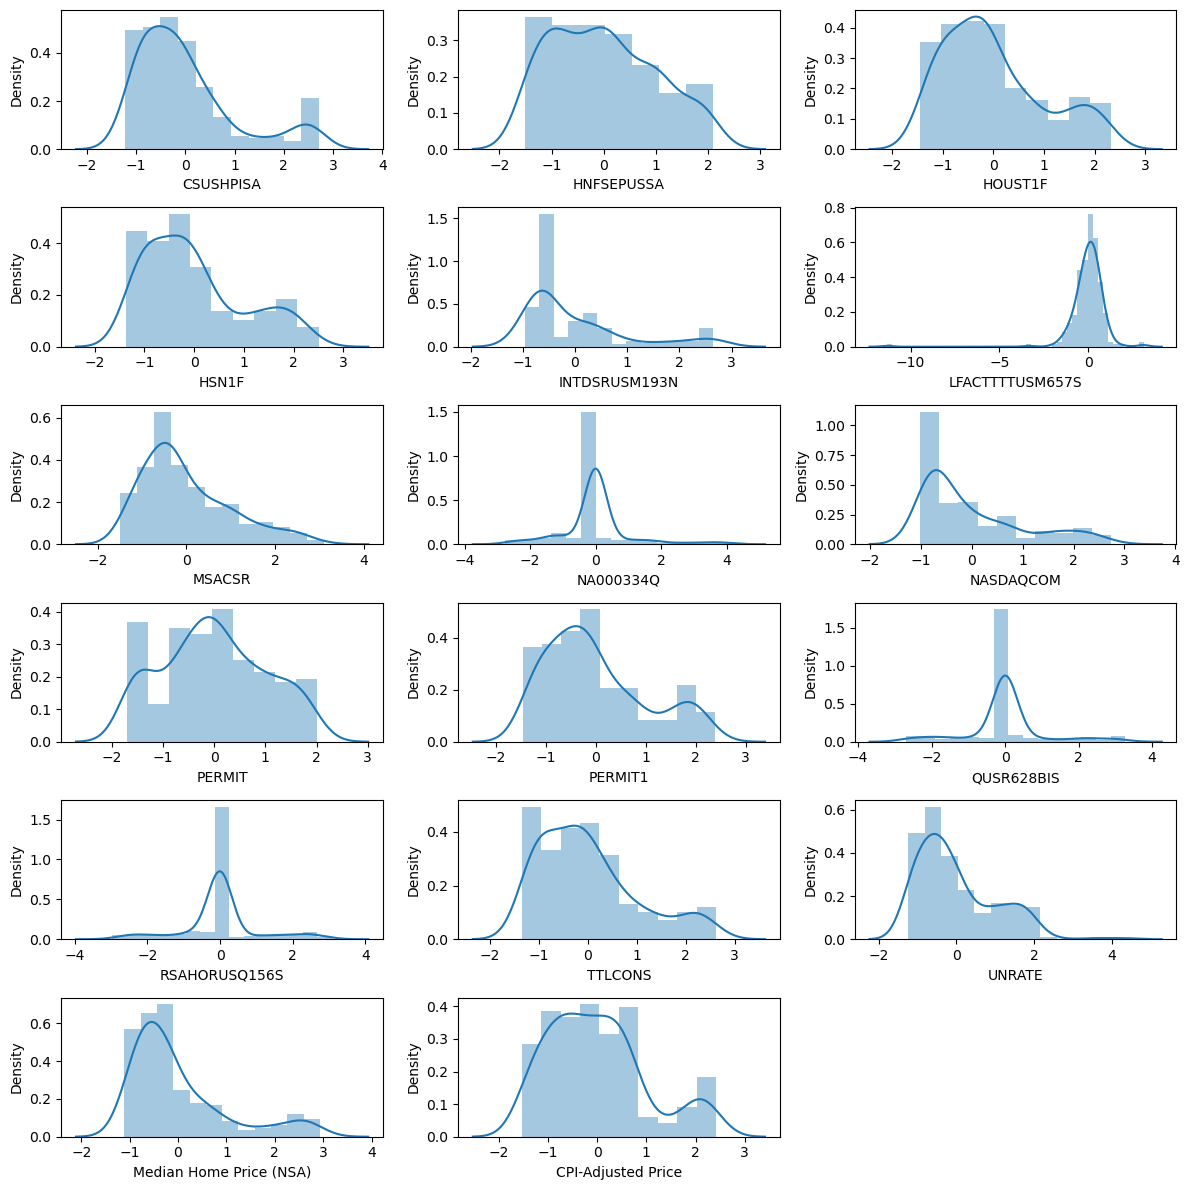

In [39]:
fig, axes = plt.subplots(6, 3, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.distplot(Data.iloc[:, i], kde=True, ax=axes[i - 1])
    

for i in range(17, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

## We can say that most of the features are normally diatributed
* HOUST1F-->	New Privately-Owned Housing Units Started: Single-Family Units.--> # it is following the same trend as of S and P HPI
* NA000334Q -->	Gross Domestic Product 	: small change in GDP result in huge change in S and P HPI 
*  Median home price: it is directly related to  s and P HPI
* TTLCONS and HSNIF -->	Total Construction Spending: Total Construction in the United States,New One Family Houses Sold: United States-->its also directly related to s and P HPI
* CPI --> consumer price index --> following the same trend as of S and P HPI
* UNRATE 	Unemployment Rate 	 --> unemployment rate hardly matters as it folows the same trend


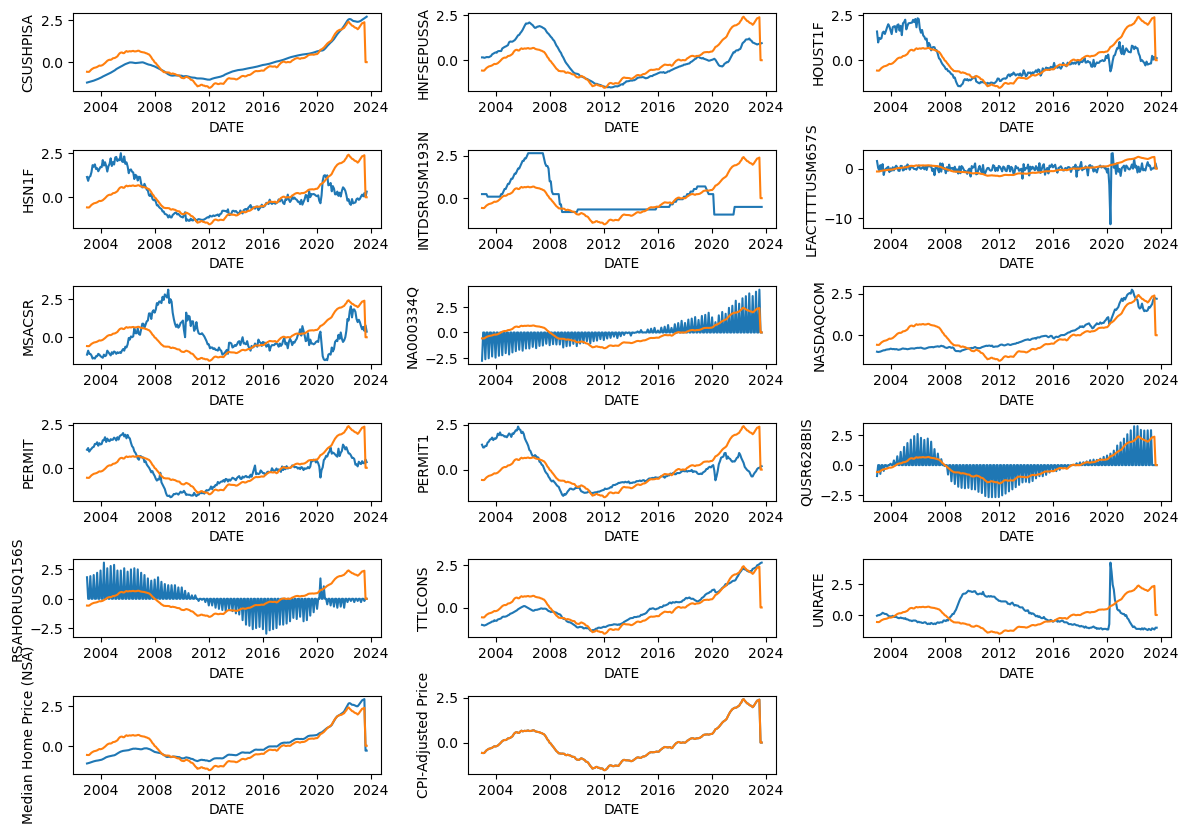

In [40]:
# visualizing trend of each feature with target feature

fig, axes = plt.subplots(9, 3, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.lineplot(x=Data.iloc[:, 0],y=Data.iloc[:,i], ax=axes[i - 1])
    sns.lineplot(x=Data.iloc[:, 0],y=Data.iloc[:,-1], ax=axes[i - 1])
    

for i in range(17, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

<Axes: >

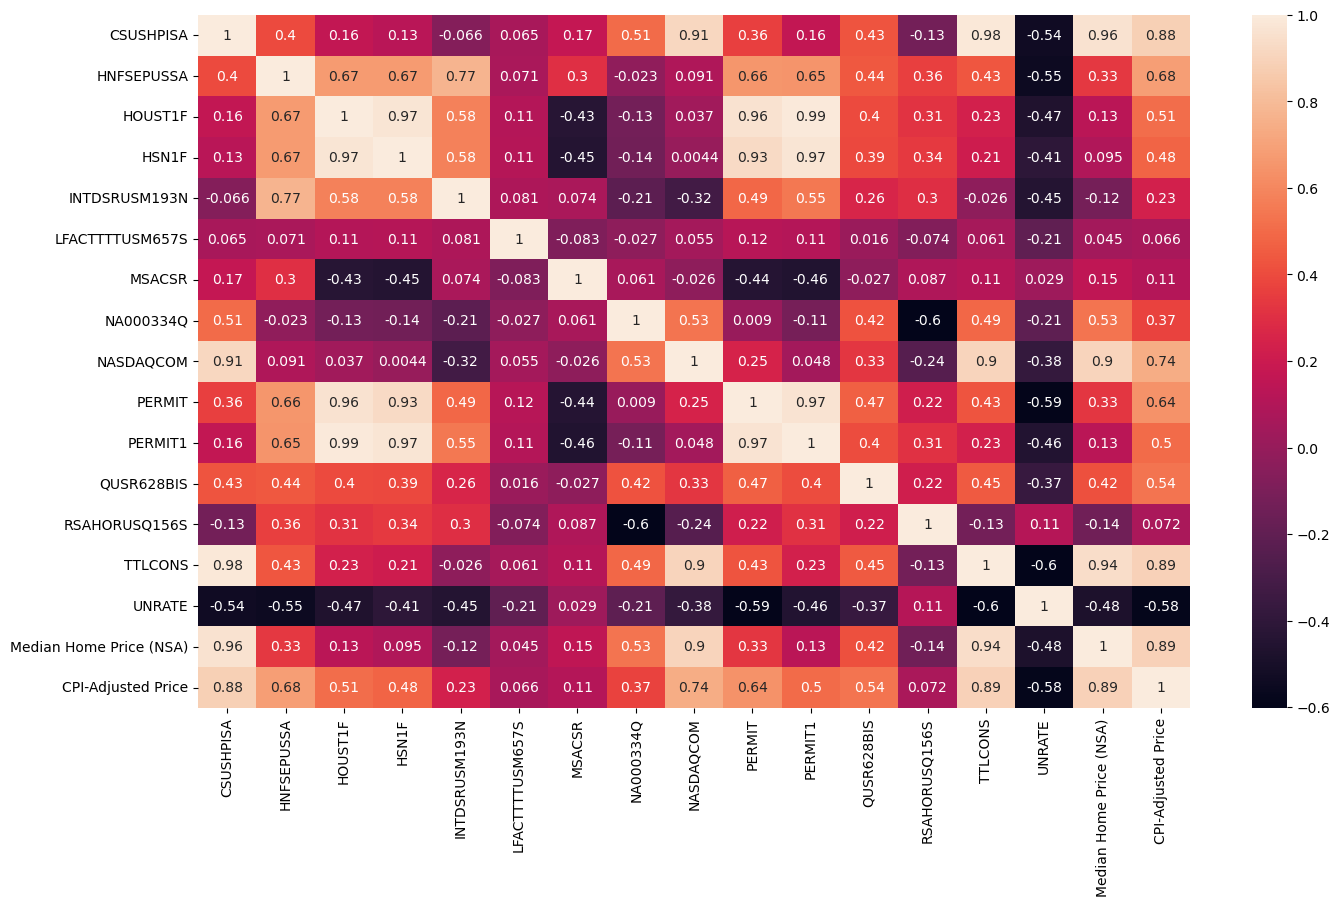

In [41]:
# Checking multicollinearity between the features
plt.figure(figsize=(16,9))
sns.heatmap(final.corr(),annot=True)

In [42]:
Data.describe()

,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price
count,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02
mean,-6.277888e-16,2.853585e-17,1.284113e-16,2.853585e-17,2.853585e-17,5.796345e-18,-1.997510e-16,-1.712151e-16,1.712151e-16,-5.707171e-17,-1.426793e-17,1.569472e-16,-5.707171e-16,-3.424302e-16,-2.282868e-16,5.707171e-17,-2.853585e-16
std,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00
min,-1.219277e+00,-1.515095e+00,-1.450468e+00,-1.375870e+00,-9.624377e-01,-1.131679e+01,-1.494504e+00,-2.753123e+00,-1.008187e+00,-1.701790e+00,-1.459288e+00,-2.693921e+00,-2.969536e+00,-1.354749e+00,-1.235247e+00,-1.111243e+00,-1.531404e+00
25%,-7.925370e-01,-8.850708e-01,-7.793983e-01,-8.039889e-01,-6.619399e-01,-3.335870e-01,-6.674302e-01,0.000000e+00,-7.617510e-01,-6.742137e-01,-7.134989e-01,0.000000e+00,0.000000e+00,-8.061048e-01,-7.459429e-01,-7.065852e-01,-7.823351e-01
50%,-2.312746e-01,-3.663758e-02,-1.906056e-01,-2.009137e-01,-5.116910e-01,9.170994e-02,-3.055854e-01,0.000000e+00,-4.651114e-01,-3.516317e-02,-2.048864e-01,0.000000e+00,0.000000e+00,-1.428366e-01,-2.566389e-01,-3.049982e-01,-1.161585e-01
75%,3.839736e-01,8.033953e-01,5.627405e-01,5.581292e-01,2.395535e-01,4.709697e-01,5.731803e-01,0.000000e+00,5.404365e-01,7.227804e-01,6.305029e-01,0.000000e+00,0.000000e+00,4.701589e-01,6.241082e-01,3.921632e-01,5.414550e-01
max,2.715289e+00,2.097046e+00,2.329119e+00,2.502527e+00,2.643536e+00,3.151822e+00,3.106093e+00,4.176120e+00,2.735846e+00,2.013620e+00,2.390882e+00,3.271108e+00,3.079433e+00,2.625114e+00,4.293888e+00,2.935494e+00,2.415632e+00


In [43]:
# Model development

<Axes: >

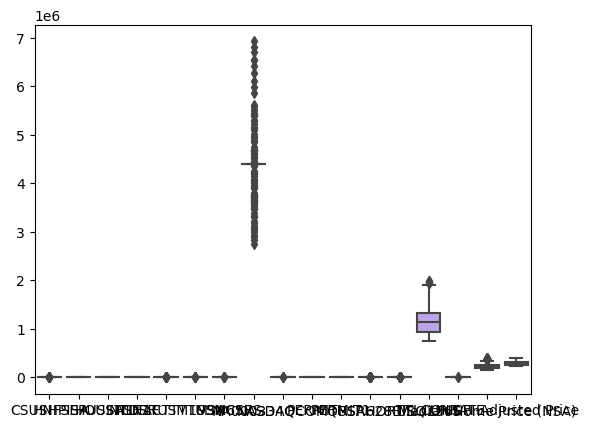

In [44]:
import seaborn as sns
sns.boxplot(data=final)

In [45]:
for i in final:                  # i = column name 
    if  final[i].dtypes in ("float64","int64"): # every column will select float & int column only
        q1 =  final[i].quantile(0.25)  # for 1 column compute q1
        q3 =  final[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        final[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

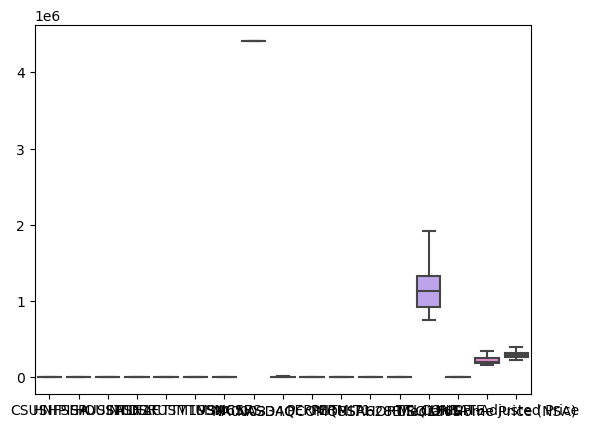

In [46]:
sns.boxplot(data=final)

# Model using Decision tree

In [47]:
final

,DATE,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price
0,2003-01-01,128.4610,341.0,1537,999,2.25,0.600416,4.0,4.403328e+06,1389.559524,1808.0,1416.0,124.572444,66.192771,863855.0,5.8,160883.13,271850.870000
1,2003-02-01,129.3550,341.0,1301,936,2.25,0.111692,4.5,4.403328e+06,1313.261579,1854.0,1357.0,124.572444,66.192771,859225.0,5.9,161921.15,271512.850000
2,2003-03-01,130.1480,338.0,1399,999,2.25,-0.053388,4.1,4.403328e+06,1348.503810,1757.0,1359.0,124.572444,66.192771,851132.0,5.9,163045.67,271765.800000
3,2003-04-01,130.8840,340.0,1374,1012,2.25,0.309542,4.1,4.403328e+06,1409.830952,1803.0,1391.0,124.572444,66.192771,859459.0,6.0,164583.47,274926.030000
4,2003-05-01,131.7350,343.0,1391,1078,2.25,0.017751,3.9,4.403328e+06,1524.182857,1835.0,1389.0,124.572444,66.192771,866814.0,6.1,166198.17,278077.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,284.8655,426.0,1012,710,1.00,0.077990,7.2,4.403328e+06,12446.530455,1496.0,902.0,124.572444,66.192771,1921686.0,3.7,348317.41,400671.210000
245,2023-06-01,284.8655,429.0,930,683,1.00,0.079728,7.5,4.403328e+06,13463.777619,1441.0,924.0,124.572444,66.192771,1921686.0,3.6,348317.41,401625.470000
246,2023-07-01,284.8655,431.0,988,736,1.00,0.091045,7.0,4.403328e+06,14033.091000,1443.0,930.0,124.572444,66.192771,1921686.0,3.5,348317.41,403312.740000
247,2023-08-01,284.8655,432.0,933,676,1.00,0.440447,7.7,4.403328e+06,13743.213043,1541.0,948.0,124.572444,66.192771,1921686.0,3.8,208833.78,297347.007045


In [48]:
final.drop('DATE',axis=1,inplace=True)

In [49]:
from sklearn.model_selection import train_test_split

x = final.drop(['CSUSHPISA'],axis=1)
y = final[['CSUSHPISA']]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

In [50]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price
98,139.981,179.0,429,300,0.75,0.105734,7.2,4.403328e+06,2722.289130,583.0,399.0,124.572444,66.192771,769157.0,9.0,169744.73,233215.85
125,154.199,161.0,614,470,0.75,0.136946,4.1,4.403328e+06,3416.741500,942.0,628.0,124.572444,66.192771,899295.0,7.5,192907.90,253647.65
152,173.828,224.0,746,456,0.75,-0.279312,5.9,4.403328e+06,4748.004762,1144.0,711.0,124.572444,66.192771,1163937.0,5.0,212043.95,273605.27
203,213.933,323.0,1009,693,2.25,0.091764,5.6,4.403328e+06,8778.591476,1461.0,937.0,124.572444,66.192771,1466415.0,3.6,266684.05,318627.32
12,141.646,374.0,1560,1165,2.00,0.077013,3.8,4.403328e+06,2098.004000,1952.0,1539.0,124.572444,66.192771,938525.0,5.7,173589.24,287777.59


In [75]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeRegressor(criterion='squared_error',  #splitter
                                 min_samples_leaf=20, ## child
                                 min_samples_split=30, #parent 
                                 max_depth=30)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=20, min_samples_split=30)

In [76]:
independent_variable = list(train.columns[1:])
independent_variable

['HNFSEPUSSA',
 'HOUST1F',
 'HSN1F',
 'INTDSRUSM193N',
 'LFACTTTTUSM657S',
 'MSACSR',
 'NA000334Q',
 'NASDAQCOM',
 'PERMIT',
 'PERMIT1',
 'QUSR628BIS',
 'RSAHORUSQ156S',
 'TTLCONS',
 'UNRATE',
 'Median Home Price (NSA)',
 'CPI-Adjusted Price',
 'fitted_value',
 'Residual']

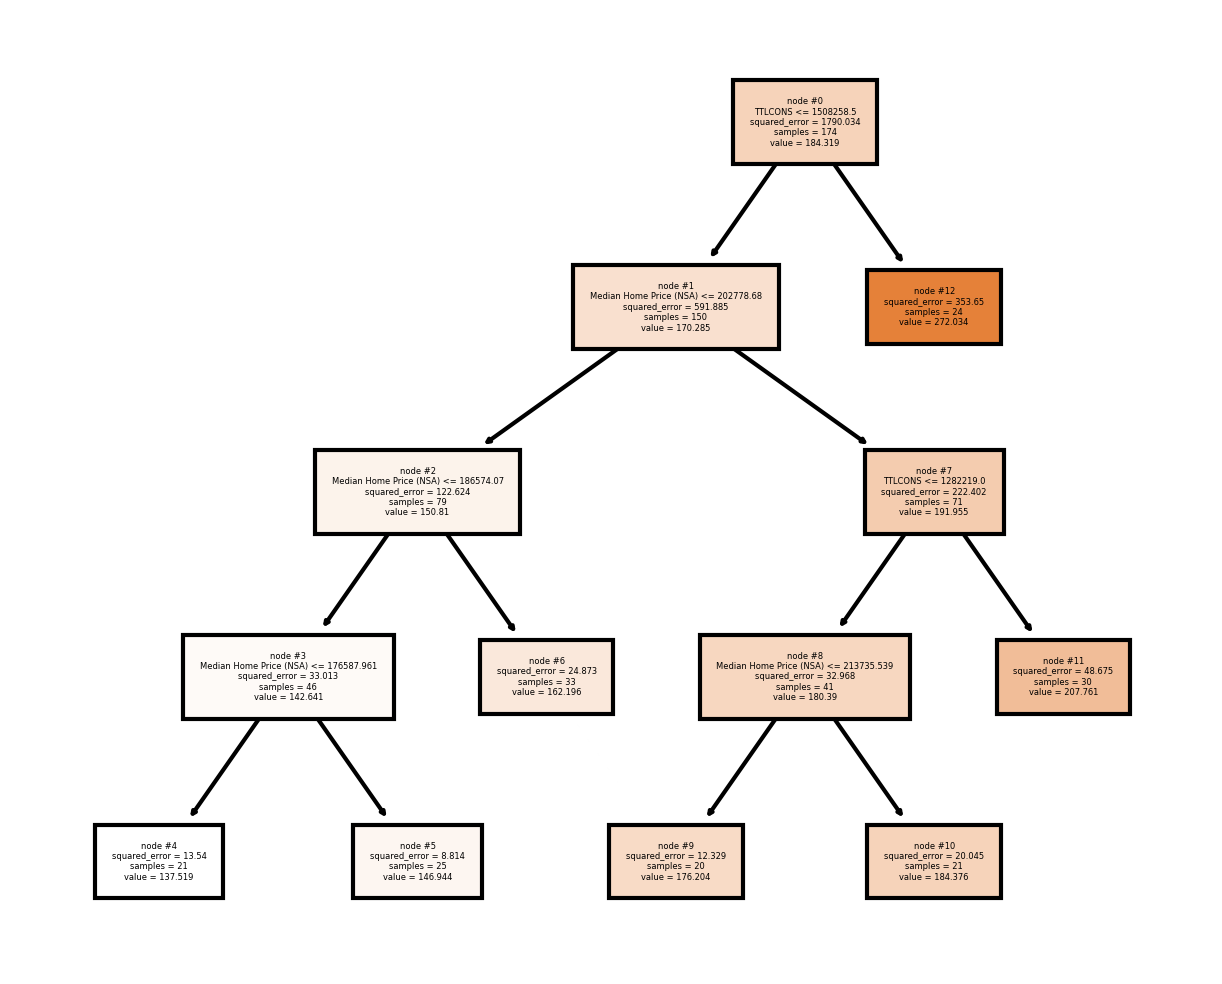

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt

target = y_train  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = target, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [78]:
# Predictions on Train Dataset

train['fitted_value'] = np.round(dt.predict(X_train),2)
train['Residual'] = np.round(train.CSUSHPISA - train.fitted_value,2)
train

,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,fitted_value,Residual
98,139.981,179.0,429,300,0.75,0.105734,7.2,4.403328e+06,2722.289130,583.0,399.0,124.572444,66.192771,769157.0,9.0,169744.73,233215.85,137.52,2.46
125,154.199,161.0,614,470,0.75,0.136946,4.1,4.403328e+06,3416.741500,942.0,628.0,124.572444,66.192771,899295.0,7.5,192907.90,253647.65,162.20,-8.00
152,173.828,224.0,746,456,0.75,-0.279312,5.9,4.403328e+06,4748.004762,1144.0,711.0,124.572444,66.192771,1163937.0,5.0,212043.95,273605.27,176.20,-2.37
203,213.933,323.0,1009,693,2.25,0.091764,5.6,4.403328e+06,8778.591476,1461.0,937.0,124.572444,66.192771,1466415.0,3.6,266684.05,318627.32,207.76,6.17
12,141.646,374.0,1560,1165,2.00,0.077013,3.8,4.403328e+06,2098.004000,1952.0,1539.0,124.572444,66.192771,938525.0,5.7,173589.24,287777.59,137.52,4.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,140.179,370.0,1647,1129,2.00,-0.184354,4.0,4.403328e+06,1956.984545,1987.0,1549.0,124.572444,66.192771,948491.0,5.7,173070.23,288318.29,137.52,2.66
201,211.791,319.0,898,721,2.25,0.216362,5.3,4.403328e+06,8079.278217,1538.0,937.0,124.572444,66.192771,1442150.0,3.6,265674.86,316962.73,207.76,4.03
148,170.881,211.0,708,502,0.75,0.376289,5.0,4.403328e+06,5029.431500,1272.0,701.0,124.572444,66.192771,1135433.0,5.6,210092.86,271247.33,176.20,-5.32
176,193.759,282.0,839,637,1.75,0.344986,5.3,4.403328e+06,6428.079000,1277.0,830.0,124.572444,66.192771,1281172.0,4.3,238676.79,296897.65,184.38,9.38


In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(train.CSUSHPISA ,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  96.0


In [80]:
# Pre3diction on text data`

In [82]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price
220,253.4070,332.0,1109,715,0.25,-0.104407,5.6,4.403328e+06,13517.682500,1680.0,1118.0,124.572444,66.192771,1628281.0,5.8,326619.96,372521.11
239,284.8655,451.0,887,636,1.00,0.266826,8.5,4.403328e+06,10838.995714,1409.0,748.0,124.572444,66.192771,1840896.0,3.5,348317.41,387788.27
191,206.1560,346.0,775,546,3.00,0.227222,7.6,4.403328e+06,6814.292316,1320.0,812.0,124.572444,66.192771,1289930.0,3.9,251882.68,307819.96
19,152.6330,405.0,1691,1175,2.50,-0.086667,4.3,4.403328e+06,1821.538182,2056.0,1609.0,124.572444,66.192771,1013616.0,5.4,186862.41,302752.60
17,149.8500,383.0,1526,1180,2.25,0.268589,3.9,4.403328e+06,2000.979524,2020.0,1615.0,124.572444,66.192771,983087.0,5.6,184123.20,298000.05


In [83]:
test['fitted_value'] = np.round(dt.predict(X_test),2)
test['Residual'] = np.round(test.CSUSHPISA - test.fitted_value,2)
test

,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,fitted_value,Residual
220,253.4070,332.0,1109,715,0.25,-0.104407,5.6,4.403328e+06,13517.682500,1680.0,1118.0,124.572444,66.192771,1628281.0,5.8,326619.96,372521.11,272.03,-18.62
239,284.8655,451.0,887,636,1.00,0.266826,8.5,4.403328e+06,10838.995714,1409.0,748.0,124.572444,66.192771,1840896.0,3.5,348317.41,387788.27,272.03,12.84
191,206.1560,346.0,775,546,3.00,0.227222,7.6,4.403328e+06,6814.292316,1320.0,812.0,124.572444,66.192771,1289930.0,3.9,251882.68,307819.96,207.76,-1.60
19,152.6330,405.0,1691,1175,2.50,-0.086667,4.3,4.403328e+06,1821.538182,2056.0,1609.0,124.572444,66.192771,1013616.0,5.4,186862.41,302752.60,162.20,-9.57
17,149.8500,383.0,1526,1180,2.25,0.268589,3.9,4.403328e+06,2000.979524,2020.0,1615.0,124.572444,66.192771,983087.0,5.6,184123.20,298000.05,146.94,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,148.0900,280.0,482,393,0.50,-0.020033,8.5,4.403328e+06,1826.988182,601.0,458.0,124.572444,66.192771,912530.0,9.5,187121.91,266356.77,162.20,-14.11
110,137.9040,145.0,472,354,0.75,0.050430,4.9,4.403328e+06,3035.915909,806.0,482.0,124.572444,66.192771,829288.0,8.2,172685.78,231128.48,137.52,0.38
245,284.8655,429.0,930,683,1.00,0.079728,7.5,4.403328e+06,13463.777619,1441.0,924.0,124.572444,66.192771,1921686.0,3.6,348317.41,401625.47,272.03,12.84
78,148.4100,270.0,509,411,0.50,-0.138318,7.9,4.403328e+06,1873.837727,595.0,489.0,124.572444,66.192771,911438.0,9.5,186429.90,265793.18,146.94,1.47


In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(test.CSUSHPISA ,test.fitted_value)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  95.0


# Model predicts the result with accuracy of 96% on the train data and 95% accuracy on 95% using decision tree regressor